In [1]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [9]:
data = np.loadtxt('meritve1.txt')

delta_T = data[:, 1] - data[:, 0]
U = data[:, 2]

dT = unp.uarray(delta_T, [2, 2, 2, 2, 2, 1, 1, 1, 1, 0.1, 0.1])

dT, U

(array([88.6+/-2.0, 84.89999999999999+/-2.0, 80.9+/-2.0, 72.9+/-2.0,
        68.9+/-2.0, 65.0+/-1.0, 58.300000000000004+/-1.0, 54.4+/-1.0,
        49.5+/-1.0, 42.6+/-0.1, 40.5+/-0.1], dtype=object),
 array([3.7 , 3.57, 3.4 , 3.07, 2.9 , 2.73, 2.47, 2.3 , 2.01, 1.73, 1.64]))

In [21]:
data1 = np.array([delta_T, U])
print(a2l.to_ltx(data1.T, frmt='{:6.2f}', arraytype='array'))

\begin{array}
   88.60 &    3.70\\
   84.90 &    3.57\\
   80.90 &    3.40\\
   72.90 &    3.07\\
   68.90 &    2.90\\
   65.00 &    2.73\\
   58.30 &    2.47\\
   54.40 &    2.30\\
   49.50 &    2.01\\
   42.60 &    1.73\\
   40.50 &    1.64
\end{array}
None


In [10]:
def linearna (x, k, n):
    return k * x + n

par, cov = curve_fit(linearna, U, unp.nominal_values(dT), sigma=unp.std_devs(dT), absolute_sigma=True)

k, n = par

dk, dn = np.sqrt(np.diag(cov))

k, dk, n, dn

(22.644996182269992,
 0.4092379480369521,
 3.3877183371818638,
 0.7026592847026149)

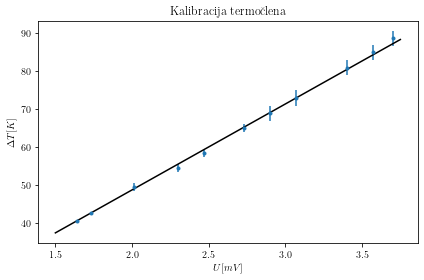

In [13]:
fig, ax = plt.subplots()

ax.errorbar(U, unp.nominal_values(dT), yerr=unp.std_devs(dT), fmt='.')

napetost = np.linspace(1.5, 3.75)

ax.plot(napetost, linearna(napetost, *par), color='k')

ax.set_title(r'Kalibracija termočlena')
ax.set_xlabel(r'$U[mV]$')
ax.set_ylabel(r"$\Delta T [K]$")
fig.tight_layout()
fig.savefig('kalibracija.pdf')

In [50]:
data = np.loadtxt('meritve2.txt')

P = data[:, 0]

U = data[:, 1]

data1 = np.array([P, U])
print(a2l.to_ltx(data1.T, frmt='{:6.1f}', arraytype='array'))


\begin{array}
    30.5 &   228.0\\
    35.0 &   275.0\\
    40.0 &   306.0\\
    44.7 &   348.0\\
    50.0 &   378.0\\
    55.9 &   409.0\\
    60.5 &   449.0
\end{array}
None


In [53]:
l = unp.uarray([5.6], [0.1]) * 1e-2
R = unp.uarray([4.46], [0.01]) * 1e-2 / 2

S = np.pi * R ** 2

dT = linearna(U, *par)

par, cov = curve_fit(linearna, unp.nominal_values(dT * S / l), P, sigma=[1] * 7)

k1, n1 = par 
dk1, dn1 = np.sqrt(np.diag(cov))

k, dk1

(22.644996182269992, 0.9252496630651096)

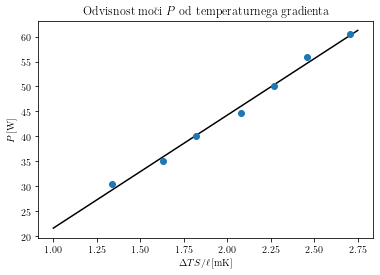

In [56]:
fig, ax = plt.subplots()

ax.scatter(unp.nominal_values(dT * S / l), P, zorder=3)
x_lin = np.linspace(1, 2.75)
ax.plot(x_lin, linearna(x_lin, *par), color='k')

ax.set_title(r'Odvisnost moči $P$ od temperaturnega gradienta')
ax.set_xlabel(r'$\Delta T S / \ell \,[\mathrm{mK}]$')
ax.set_ylabel(r"$P\,[\mathrm{W}]$")
fig.savefig('lambda-fit.pdf')